In [53]:
%matplotlib notebook

C:\Users\q4fj4lj9\AppData\Local\Continuum\Miniconda\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


<IPython.core.display.Javascript object>


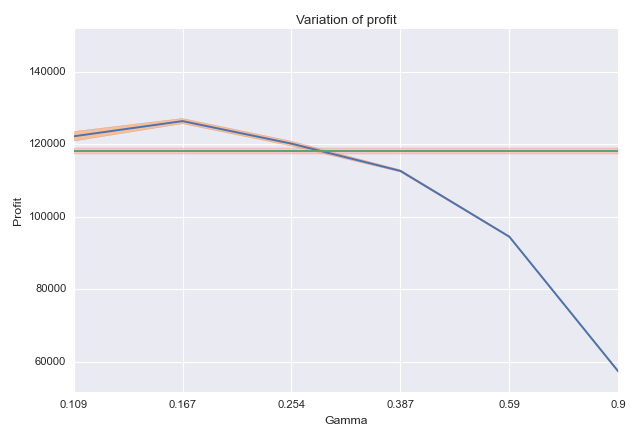

In [128]:
import pickle
import numpy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import networkx as nx
import seaborn as sns
matplotlib.use('Agg')
fig = plt.figure()
ax = fig.add_subplot(111)

data = pickle.load(open('plot_data.pkl','rb'))
total_profit_array = data['total_profit_array']
GAMMA_ARRAY_ALL = data['instance']['instance_params']['GAMMA_ARRAY_ALL']

temp = total_profit_array.transpose()
#print temp
temp_avg = numpy.median(temp, axis=0)
#print temp_avg
temp_std = 0.2*numpy.std(temp, axis=0)

xs = range(len(GAMMA_ARRAY_ALL)-1)#
#xs = numpy.asarray(GAMMA_ARRAY_ALL[1:])
ys = temp_avg[1:]
ys_std = temp_std[1:]

ax.fill_between(xs, ys-ys_std, ys+ys_std, alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
ax.plot(xs, ys)

ys_baselime = numpy.asarray([temp_avg[0] for x in range(len(ys))])
ys_std_baseline = numpy.asarray([temp_std[0] for x in range(len(ys))])
ax.fill_between(xs, ys_baselime-ys_std_baseline, ys_baselime+ys_std_baseline, alpha=0.5, edgecolor='#CC4F1B', facecolor='#FFAAAA')
ax.plot(xs, ys_baselime)

plt.setp(ax, xticks=xs, xticklabels=GAMMA_ARRAY_ALL[1:])
#plt.xscale('log')
plt.xlabel('Gamma')
plt.ylabel('Profit')
plt.title('Variation of profit')
plt.tight_layout()
plt.ylim((.9*min(ys),1.2*max(ys)))
plt.show()